In [60]:
import time, warnings
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler
import functions as func
import pandas as pd

rs = 32
data = pd.read_csv('data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

In [181]:
corr_data = func.red_correlations(data, tr=0.95)

##########################################################

data_nm = func.normalize_n(corr_data, ['class','gender'])

##########################################################

data_smote =func.smote_split(data_nm, 'class',random_state=rs, in_df=False)
data_s_nn = func.smote_split(corr_data, 'class',random_state=rs, in_df=False)

data_nm.head()

,DFA,Ea,Ea2,Ed2_10_coef,Ed2_1_coef,Ed2_2_coef,Ed2_3_coef,Ed2_4_coef,Ed2_5_coef,Ed2_6_coef,...,tqwt_stdValue_dec_35,tqwt_stdValue_dec_36,tqwt_stdValue_dec_4,tqwt_stdValue_dec_5,tqwt_stdValue_dec_6,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9,class,gender
0,0.565310,0.999902,1.000000,0.000061,6.719929e-07,0.000003,0.000026,0.000087,0.000317,0.000048,...,0.005740,0.003267,0.006535,0.006860,0.014577,0.035157,0.044976,0.070611,1,1
1,0.489455,0.999951,1.000000,0.000004,7.668467e-07,0.000005,0.000046,0.000136,0.000144,0.000136,...,0.007579,0.005475,0.009918,0.007871,0.010565,0.023650,0.034650,0.064451,1,1
2,0.428738,0.999976,1.000000,0.000005,4.769413e-07,0.000004,0.000038,0.000147,0.000072,0.000129,...,0.006834,0.002816,0.004820,0.004175,0.008409,0.020432,0.026065,0.037461,1,1
3,0.819111,0.775793,0.882092,0.048392,3.306638e-02,0.069904,0.066221,0.132926,0.134877,0.221548,...,0.096891,0.118559,0.052193,0.043837,0.032883,0.049346,0.058040,0.100590,1,0
4,0.822669,0.680682,0.796543,0.193636,3.588929e-02,0.046301,0.044657,0.209088,0.078664,0.172272,...,0.069377,0.129089,0.054718,0.044076,0.033403,0.044226,0.058777,0.111781,1,0


In [182]:
trnX, trnY, tstX, tstY, labels = data_smote
X = np.append(trnX, tstX, axis=0)
y = np.append(trnY, tstY, axis=0).reshape((-1))
print(X.shape)

trnX, trnY, tstX, tstY, labels = data_s_nn
Xn = np.append(trnX, tstX, axis=0)
yn = np.append(trnY, tstY, axis=0).reshape((-1))
Xn = StandardScaler().fit_transform(Xn)
print(Xn.shape)

(1017, 707)
(1017, 707)


<Figure size 432x288 with 0 Axes>

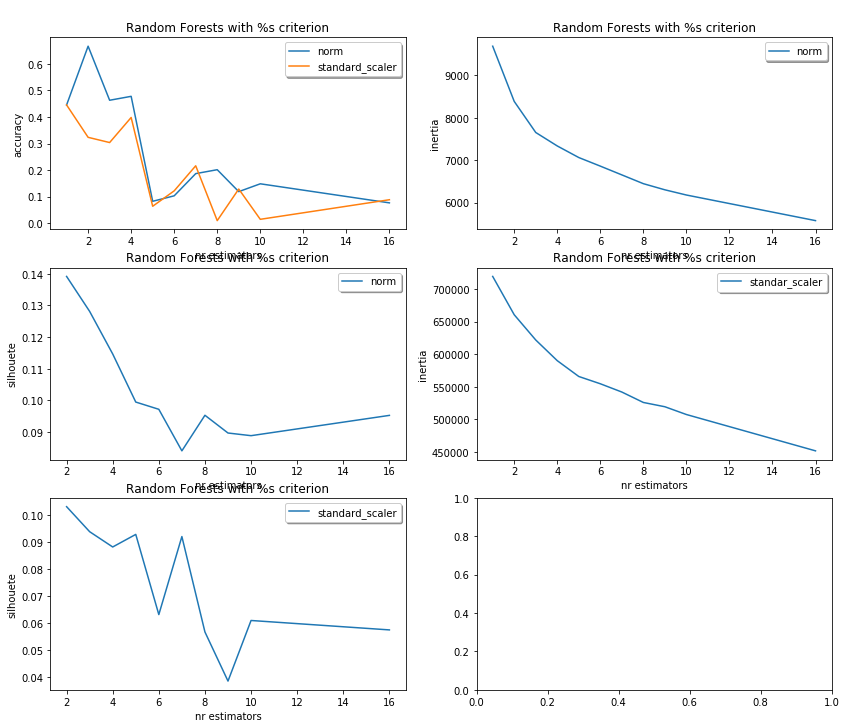

In [183]:
n_clusters = [1,2,3,4,5,6,7,8,9,10,16]

plt.figure()
fig, axs = plt.subplots(3, 2, figsize=(14, 12), squeeze=False)
accs = []
accsn=[]
inertias = []
inertiasn=[]
sil = []
siln = []

for n in n_clusters:
    kmeans = cluster.KMeans(n_clusters=n, random_state=1).fit(X)
    kmeansn = cluster.KMeans(n_clusters=n, random_state=1).fit(Xn)
    prdY = kmeans.labels_
    prdYn = kmeansn.labels_
    accs.append(metrics.accuracy_score(y, prdY))
    accsn.append(metrics.accuracy_score(yn, prdYn))
    inertias.append(kmeans.inertia_)
    inertiasn.append(kmeansn.inertia_)
    if n!=1:
        sil.append(metrics.silhouette_score(X, prdY))
        siln.append(metrics.silhouette_score(Xn, prdYn))

values={}
ivalues={}
ivaluesn={}
svalues={}
svaluesn={}
values["norm"] = accs
values["standard_scaler"] = accsn
ivalues["norm"] = inertias
ivaluesn["standar_scaler"] = inertiasn
#ivalues2["mekie"] = inertias[1:] 
svalues["norm"] = sil
svaluesn["standard_scaler"] = siln
func.multiple_line_chart(axs[0, 0], n_clusters, values, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'accuracy', percentage=False)
func.multiple_line_chart(axs[0, 1], n_clusters, ivalues, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'inertia', percentage=False)
func.multiple_line_chart(axs[1, 0], n_clusters[1:], svalues, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'silhouete', percentage=False)
func.multiple_line_chart(axs[1, 1], n_clusters, ivaluesn, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'inertia', percentage=False)
func.multiple_line_chart(axs[2, 0], n_clusters[1:], svaluesn, '\nRandom Forests with %s criterion', 
                         'nr estimators', 'silhouete', percentage=False)
#func.multiple_line_chart(axs[1, 1], n_clusters[1:], ivalues2, 'Random Forests with %s criterion', 
#                         'nr estimators', 'inertia', percentage=False)
plt.show()

In [192]:
k=2

kmeans_model = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
y_pred = kmeans_model.labels_

 
print("Accuracy: ", metrics.accuracy_score(y, y_pred))
print("Silhouette:",metrics.silhouette_score(X, y_pred))
print("Adjusted rand score: ", metrics.cluster.adjusted_rand_score(y, y_pred))

print("\nSum of squared distances:",kmeans_model.inertia_)
print("Calinski Harabaz:",metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin:",metrics.davies_bouldin_score(X, y_pred))
print("Silhouette per instance:",metrics.silhouette_samples(X, y_pred))

Accuracy:  0.6666666666666666
Silhouette: 0.13916622652175026
Adjusted rand score:  0.10961342378145476

Sum of squared distances: 8386.598074973688
Calinski Harabaz: 157.7151833658264
Davies Bouldin: 2.3428408982189506
Silhouette per instance: [0.19302361 0.0329565  0.12975913 ... 0.02231713 0.16426258 0.17899244]


In [193]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

X_k = SelectKBest(f_classif, k=2).fit_transform(Xn, y)
X_pca = PCA(n_components=2, copy=True).fit_transform(Xn)
print(X_k.shape)
print(X_pca.shape)

(1017, 2)
(1017, 2)


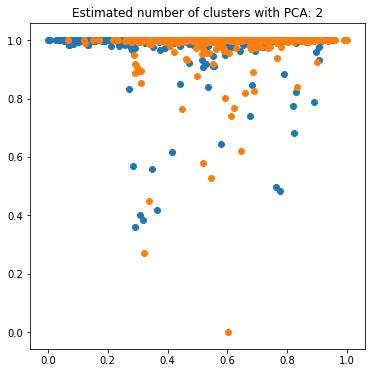

In [207]:
k=2

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1])
    
    
plt.title('Estimated number of clusters with PCA: %d' % n_clusters_)
plt.show()

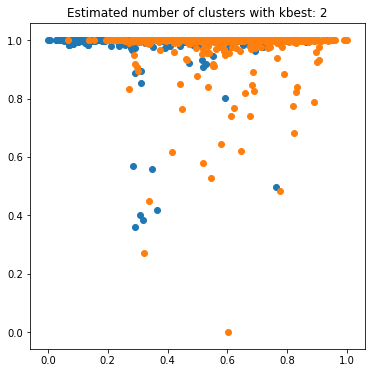

In [206]:
k=2

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_k)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1])
    
plt.title('Estimated number of clusters with kbest: %d' % n_clusters_)
plt.show()

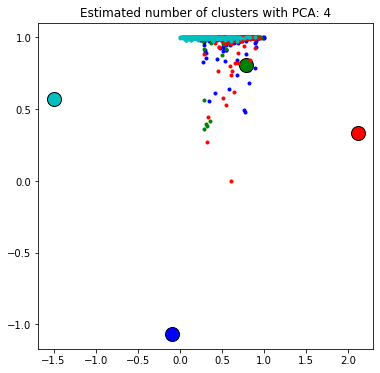

In [188]:
k=4

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters with PCA: %d' % n_clusters_)
plt.show()

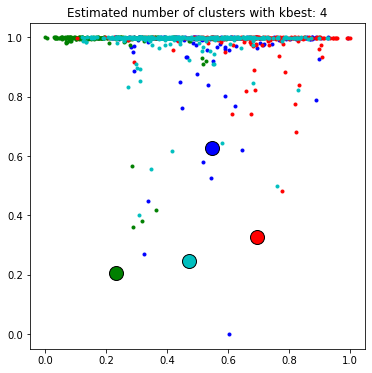

In [189]:
k=4

ms = cluster.KMeans(n_clusters=k, random_state=1)
ms.fit(X_k)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 3 plot results
plt.figure(1, figsize=(6,6))
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters with kbest: %d' % n_clusters_)
plt.show()

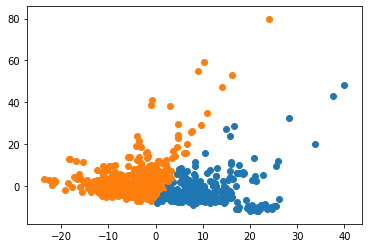

In [199]:
plt.figure()
#plt.set_title("%s x %s"%(var1,var2))
#plt.set_xlabel(var1)
#plt.set_ylabel(var2)

ms = cluster.KMeans(n_clusters=2, random_state=1)
ms.fit(X_pca)

for i,x in enumerate(X_pca):
    if ms.labels_[i] ==1:
        plt.scatter(x[0],x[1], c="tab:blue", label="true")
    else:
        plt.scatter(x[0],x[1], c="tab:orange", label="false")
        
plt.show()

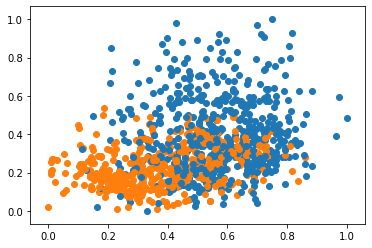

In [191]:
plt.figure()
#plt.set_title("%s x %s"%(var1,var2))
#plt.set_xlabel(var1)
#plt.set_ylabel(var2)
for i,x in enumerate(X_k):
    if y[i] ==1:
        plt.scatter(x[0],x[1], c="tab:blue", label="true")
    else:
        plt.scatter(x[0],x[1], c="tab:orange", label="false")
        
plt.show()

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [65.0, 65.0, 88.125, 88.125],
  [55.0, 55.0, 76.5625, 76.5625],
  [45.0, 45.0, 65.78125, 65.78125],
  [35.0, 35.0, 55.390625, 55.390625],
  [25.0, 25.0, 45.1953125, 45.1953125],
  [15.0, 15.0, 35.09765625, 35.09765625],
  [135.0, 135.0, 145.0, 145.0],
  [25.048828125, 25.048828125, 140.0, 140.0],
  [5.0, 5.0, 82.5244140625, 82.5244140625]],
 'dcoord': [[0.0, 0.06232802290027804, 0.06232802290027804, 0.0],
  [0.0, 0.06309935292721132, 0.06309935292721132, 0.0],
  [0.0, 0.0643634906812772, 0.0643634906812772, 0.06309935292721132],
  [0.06232802290027804,
   0.07288319077759704,
   0.07288319077759704,
   0.0643634906812772],
  [0.0, 0.07295750965888784, 0.07295750965888784, 0.07288319077759704],
  [0.0, 0.07879774261432802, 0.07879774261432802, 0.07295750965888784],
  [0.0, 0.0850518554816689, 0.0850518554816689, 0.078797742

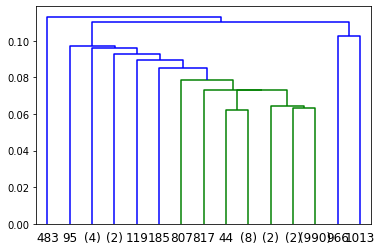

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_k)
dendrogram(Z,p=15, truncate_mode="lastp")

# 1
# 2
# 3
# 4
# 5
# 6
# 7 
# 8
# André a inventar já

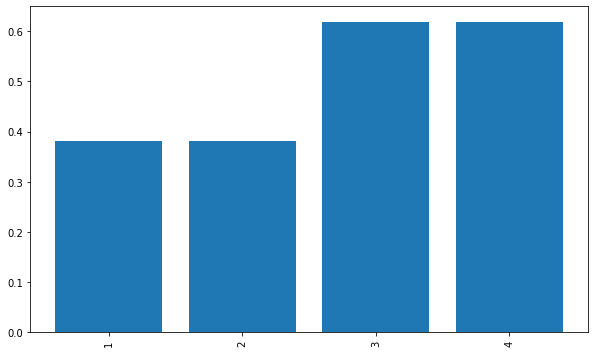

[0.3815142576204523, 0.3815142576204523, 0.6184857423795477, 0.6184857423795477]


In [106]:
clust1 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
clust2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
clust3 = cluster.AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)
clust4 = cluster.AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
pred1 = clust1.labels_
pred2 = clust2.labels_
pred3 = clust3.labels_
pred4 = clust4.labels_
acc1 = metrics.accuracy_score(y, pred1)
acc2 = metrics.accuracy_score(y, pred2)
acc3 = metrics.accuracy_score(y, pred3)
acc4 = metrics.accuracy_score(y, pred4)
#unique, counts = np.unique(pred, return_counts=True)
accs = [acc1, acc2, acc3, acc4]
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(accs)), accs)
plt.xticks(np.arange(len(accs)), ['1','2', '3', '4'], rotation='vertical')
plt.show()
print(accs)

/home/amppatricio/anaconda3/envs/cd/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/amppatricio/anaconda3/envs/cd/lib/python3.7/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


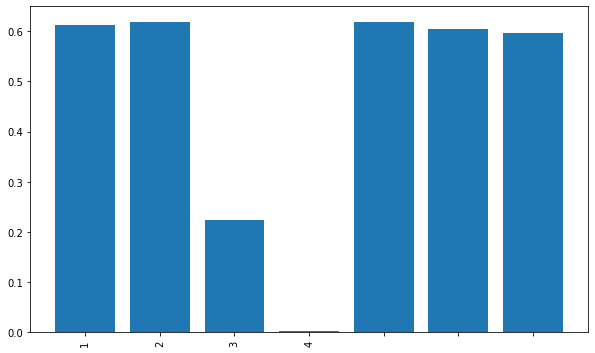

[0.6116027531956736, 0.6184857423795477, 0.2232055063913471, 0.0019665683382497543, 0.6184857423795477, 0.6047197640117994, 0.5958702064896755]
[0.6116027531956736, 0.6184857423795477, 0.2232055063913471, 0.0019665683382497543, 0.6184857423795477, 0.6047197640117994, 0.5958702064896755]


In [114]:
params = {'n_clusters':3, 'quantile':.3, 'eps':.3, 'damping':.9, 'preference':-200, 'n_neighbors':10}
algorithms = {}

algorithms['MiniBatchKMeans'] = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
algorithms['DBSCAN'] = cluster.DBSCAN(eps=params['eps'])
algorithms['Spectral'] = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")
algorithms['AffinityPropagation'] = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
algorithms['Birch'] = cluster.Birch(n_clusters=params['n_clusters'])
algorithms['GaussianMixture'] = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
algorithms['MeanShift'] = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

accs=[]
for alg in algorithms:
    clust =  algorithms[alg].fit(X)
    
    if hasattr(clust, 'labels_'): pred = clust.labels_
    else: pred = clust.predict(X)

    accs.append(metrics.accuracy_score(y, pred))
    
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(accs)), accs)
plt.xticks(np.arange(len(accs)), ['1','2', '3', '4'], rotation='vertical')
plt.show()
print(accs)